<a href="https://colab.research.google.com/github/zack-murray/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).





---

##1) Write a function

---



In [0]:
# function to find probablity of drunk
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate, number_of_tests):
  prob_drunk_new = prob_drunk_prior       #at beginning of a Bayesian calculation, the posterior(prob_drunk_new) and the prior (prob_drunk_prior) are the same thing
  for test in range(0, number_of_tests):  #enables us to carry out X amount of tests
    prob_drunk = prob_drunk_new
    compliment_prior = 1-prob_drunk
    breath_fp = false_positive_rate
    breath_tp = true_positive_rate
    numerator = (breath_tp*prob_drunk)
    denominator = ((breath_tp*prob_drunk)+(breath_fp*compliment_prior))
    prob_drunk_new = numerator/denominator
  return prob_drunk_new



---



*   What is the probability that a person is drunk after one positive breathalyzer test?
*   What is the probability that a person is drunk after two positive breathalyzer tests?
*   How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?


---



In [34]:
#probability after one positive breathalyzer test

prob_drunk_given_positive(.0001, .08, 1, 1)

0.00124856415122609

In [35]:
#probability after two positive breathalyzer tests
prob_drunk_given_positive(.0001, .08, 1, 2)

0.015386130326678318

In [38]:
#probability finally greater than 95%, after 5 tests
prob_drunk_given_positive(.0001, .08, 1, 5)

0.9682747459668459



---

## 2) Explore scipy.stats.bayes_mvs

---



In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

In [0]:
import pandas as pd
import numpy as np 
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})
df.fillna(df.mean(), inplace=True)  #Getting rid of NaNs so I can see the means

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [70]:
# Experiment with scipy using the voting-records dataset from earlier this week
dem['el-salvador-aid'].mean()

0.22867843766720178

In [79]:
# Results via Bayesian approach
mean_CI, _, _, = stats.bayes_mvs(dem['el-salvador-aid'], alpha=.95)

ci1 = mean_CI

ci1

Mean(statistic=0.22867843766720175, minmax=(0.1796185414603655, 0.277738333874038))

In [0]:
def confidence_interval(data, confidence=0.95): #Setting up confidence interval
  data = np.array(data)                         #for frequentist approach
  mean = np.nanmean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr = stats.sem(data, nan_policy='omit')
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [77]:
 # Results via frequentist approach
ci2 = confidence_interval(dem['el-salvador-aid'])

ci2


(0.22867843766720175, 0.1796185414603655, 0.277738333874038)

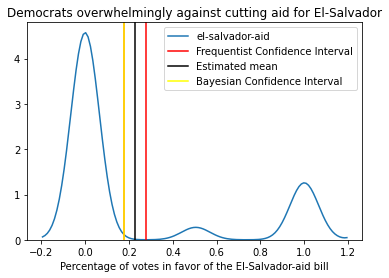

In [89]:
#Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach

sns.kdeplot(dem['el-salvador-aid'])

plt.title('Democrats overwhelmingly against cutting aid for El-Salvador')
plt.xlabel('Percentage of votes in favor of the El-Salvador-aid bill')

# Plot Frequentist Confidence Intervals
plt.axvline(x=ci2[1], color='red', label='Frequentist Confidence Interval')
plt.axvline(x=ci2[2], color='red')

# Plot Estimated Mean
plt.axvline(x=ci2[0], color='black', label='Estimated mean')

# Plot Bayesian Confidence Intervals
plt.axvline(ci1.minmax[0], color='yellow', label='Bayesian Confidence Interval')


plt.legend()
plt.show()



---

"with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general"

---



In [0]:
# Just like it says above, my two confidence intervals look identical. To represent
# that, I deleted the yellow line outlining the upper confidence level of the 
# Bayesian interval.



---

## 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

---





---

After going back over the lecture with Ryan this morning, it seems that the big difference between the two schools is probability. Take, for example, the XKCD comic that we started with in lecture. The neutrino detector set off a false positive, saying that the sun had gone nova, but the frequentist takes this as inherent truth, as the chance of it happening is less than the p-value. In this case, the frequentist is applying probability to their data, but not their parameters. The bayesian, however, applies probability to the parameters, and draws a less absurb conclusion based on their prior belief that the sun going nova is extremely low. While the frequentist derives their conclusions off the data alone, the bayesian will refer to prior beliefs to add to their data, leading them to a different conclusion. 

---



## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!